<a href="https://colab.research.google.com/github/dolt294/ken01/blob/main/05_sound_class_flow_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNNを使ったヒグラシの音声認識（モデル構築編）～夏休みの自由研究～<br>
https://qiita.com/tomato1997/items/52f3d9775162c3283af8

最初に、収集した音源データを処理する<p>

ffmpeg を使って m4a を wav に変換し、その後で 指定秒数毎に<br>
ファイルを分割して、フォルダに格納する

分割方法は次のサイトを参考にした<br>
Pythonでwavファイルを分割<br>
https://coffee-blue-mountain.com/python-wav-cut-210809/<br>

In [3]:
import wave
import struct
import math
import os
from scipy import fromstring, int16

In [4]:
!pip install ffmpeg-python
import ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!wget "https://github.com/dolt294/ken01/raw/main/gas2_20L.zip"

--2023-06-14 23:31:09--  https://github.com/dolt294/ken01/raw/main/gas2_20L.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dolt294/ken01/main/gas2_20L.zip [following]
--2023-06-14 23:31:09--  https://raw.githubusercontent.com/dolt294/ken01/main/gas2_20L.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21192086 (20M) [application/zip]
Saving to: ‘gas2_20L.zip’

gas2_20L.zip        100%[===================>]  20.21M  --.-KB/s    in 0.1s    

2023-06-14 23:31:10 (212 MB/s) - ‘gas2_20L.zip’ saved [21192086/21192086]



In [8]:
!unzip gas2_20L.zip

Archive:  gas2_20L.zip
  inflating: gas02L.aac              
  inflating: gas05L.aac              
  inflating: gas08L.aac              
  inflating: gas11L.aac              
  inflating: gas14L.aac              
  inflating: gas17L.aac              
  inflating: gas20L.aac              


In [15]:
def wav_cut(filename,time):

    # ファイルを読み出し
    wavf = filename + '.wav'
    wr = wave.open(wavf, 'r')


    # waveファイルが持つ性質を取得
    ch = wr.getnchannels()
    width = wr.getsampwidth()
    fr = wr.getframerate()
    fn = wr.getnframes()
    total_time = 1.0 * fn / fr
    integer = math.floor(total_time) # 小数点以下切り捨て
    t = int(time)  # 秒数[sec]
    frames = int(ch * fr * t)
    num_cut = int(integer//t)

    #　確認用
    print("Channel: ", ch)
    print("Sample width: ", width)
    print("Frame Rate: ", fr)
    print("Frame num: ", fn)
    print("Params: ", wr.getparams())
    print("Total time: ", total_time)
    print("Total time(integer)",integer)
    print("Time: ", t)
    print("Frames: ", frames)
    print("Number of cut: ",num_cut)
    # waveの実データを取得し、数値化
    data = wr.readframes(wr.getnframes())
    wr.close()
    X = fromstring(data, dtype=int16)
    print(X)

    for i in range(num_cut):
        print(i)
        # 出力データを生成
        # outf = 'output/' + str(i) + '.wav'
        outf = filename + '/' + str(i) + '.wav'
        start_cut = i*frames
        end_cut = i*frames + frames
        print(start_cut)
        print(end_cut)
        Y = X[start_cut:end_cut]
        outd = struct.pack("h" * len(Y), *Y)

        # 書き出し
        ww = wave.open(outf, 'w')
        ww.setnchannels(ch)
        ww.setsampwidth(width)
        ww.setframerate(fr)
        ww.writeframes(outd)
        ww.close()

後述の戻る場所はここです。<p>

In [33]:
# プログラム上で保存するフォルダを指定する。拡張子部分は要らない。
# f_name = "gas02L"  "gas05L" "gas07L" "gas11L" "gas14L" "gas17L" "gas20L"
# 上記のように順番に変更する

f_name = "gas02L"

#切り取り時間[sec]
cut_time = 2

# 保存するフォルダの作成
file = os.path.exists(f_name)
print(file)
if file == False:
    os.mkdir(f_name)
# 保存するフォルダの作成
file = os.path.exists(f_name)
print(file)
if file == False:
    os.mkdir(f_name)

False
True


In [34]:
# ここで、ffmpeg を使ってファイル変換　m4a -> wav
# 音源ファイルの拡張子に合わせて修正すること
# wav_in  = f_name + '.m4a'

wav_in  = f_name + '.aac'
wav_out = f_name + '.wav'
stream=ffmpeg.input(wav_in)
stream=ffmpeg.output(stream,wav_out)
ffmpeg.run(stream)

(None, None)

In [35]:
# 定義済みの関数を実行する
# 分割し、output フォルダに格納する
wav_cut(f_name,cut_time)

Channel:  1
Sample width:  2
Frame Rate:  48000
Frame num:  6287360
Params:  _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=6287360, comptype='NONE', compname='not compressed')
Total time:  130.98666666666668
Total time(integer) 130
Time:  2
Frames:  96000
Number of cut:  65
[ 0  0  0 ... 53 47 46]
0
0
96000
1
96000
192000
2
192000
288000
3
288000
384000
4
384000
480000
5
480000
576000
6
576000
672000
7
672000
768000
8
768000
864000
9
864000
960000
10
960000
1056000
11
1056000
1152000
12
1152000
1248000
13
1248000
1344000
14
1344000
1440000
15
1440000
1536000
16
1536000
1632000
17
1632000
1728000
18
1728000
1824000
19
1824000
1920000
20
1920000
2016000
21
2016000
2112000
22
2112000
2208000


<ipython-input-15-f7ddeca81839>:33: DeprecationWarning: scipy.fromstring is deprecated and will be removed in SciPy 2.0.0, use numpy.fromstring instead
  X = fromstring(data, dtype=int16)


23
2208000
2304000
24
2304000
2400000
25
2400000
2496000
26
2496000
2592000
27
2592000
2688000
28
2688000
2784000
29
2784000
2880000
30
2880000
2976000
31
2976000
3072000
32
3072000
3168000
33
3168000
3264000
34
3264000
3360000
35
3360000
3456000
36
3456000
3552000
37
3552000
3648000
38
3648000
3744000
39
3744000
3840000
40
3840000
3936000
41
3936000
4032000
42
4032000
4128000
43
4128000
4224000
44
4224000
4320000
45
4320000
4416000
46
4416000
4512000
47
4512000
4608000
48
4608000
4704000
49
4704000
4800000
50
4800000
4896000
51
4896000
4992000
52
4992000
5088000
53
5088000
5184000
54
5184000
5280000
55
5280000
5376000
56
5376000
5472000
57
5472000
5568000
58
5568000
5664000
59
5664000
5760000
60
5760000
5856000
61
5856000
5952000
62
5952000
6048000
63
6048000
6144000
64
6144000
6240000


変換したいファイル（.aac）があれば、上に戻ってファイル選択する<br>
必要なファイルが全て処理できたら、フォルダ名を使いたい名前に変える<br>
gas02L -> class0 、などのように<br>

class0、class1、class2 等のフォルダを<br>
全ての音声データを処理したら、次のブロックへ移動する。

In [36]:
import os
import glob
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [37]:
# load a wave data
def load_wave_data(audio_dir, file_name):
    file_path = os.path.join(audio_dir, file_name)
    x, fs = librosa.load(file_path, sr=44100)
    return x,fs

# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

# display wave in plots
def show_wave(x):
    plt.plot(x)
    plt.show()

# display wave in heatmap
def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs)
    plt.colorbar()
    plt.show()

# wavfile division
def wav_div_nparr(fname):
    x, fs = load_wave_data('', fname)
    xls = []
    for i in range(0,len(x)-fs,fs):
        xls.append(np.copy(x[i:i+fs]))
    return np.array(xls)

In [38]:
# folder = ''
files = glob.glob('class*/*.wav')
Xls = []
yls = []
for file in files:
    print(file)
    label = file[file.find('class'):file.find('.wav')].split('/')[0][5:] # classの後の数字をとってくる
    x = wav_div_nparr(file)
    for i in range(x.shape[0]):
        melsp = calculate_melsp(x[i])
        Xls.append(melsp)
        yls.append(label)
X = np.array(Xls)
X = X.reshape(X.shape[0],X.shape[1],X.shape[2],1)
Y = np.array(yls).astype(int)
print(X.shape,Y.shape)

class4/9.wav
class4/11.wav
class4/43.wav
class4/26.wav
class4/34.wav
class4/57.wav
class4/25.wav
class4/2.wav
class4/36.wav
class4/24.wav
class4/35.wav
class4/5.wav
class4/27.wav
class4/30.wav
class4/47.wav
class4/28.wav
class4/21.wav
class4/53.wav
class4/45.wav
class4/44.wav
class4/13.wav
class4/18.wav
class4/23.wav
class4/39.wav
class4/31.wav
class4/49.wav
class4/20.wav
class4/32.wav
class4/16.wav
class4/54.wav
class4/29.wav
class4/59.wav
class4/42.wav
class4/4.wav
class4/56.wav
class4/41.wav
class4/48.wav
class4/0.wav
class4/14.wav
class4/17.wav
class4/8.wav
class4/51.wav
class4/55.wav
class4/38.wav
class4/10.wav
class4/22.wav
class4/15.wav
class4/1.wav
class4/33.wav
class4/3.wav
class4/12.wav
class4/58.wav
class4/50.wav
class4/52.wav
class4/19.wav
class4/37.wav
class4/46.wav
class4/7.wav
class4/6.wav
class4/40.wav
class0/9.wav
class0/11.wav
class0/43.wav
class0/26.wav
class0/34.wav
class0/57.wav
class0/25.wav
class0/2.wav
class0/36.wav
class0/24.wav
class0/35.wav
class0/5.wav
class

In [39]:
print(Y)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [40]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y,
    random_state = 0,
    test_size = 0.2
)
# y to categorical
classes = np.max(Y)+1 # 今回は7クラス分類
# class3,class4,...,class9 までデータを作っておけば、10クラス分類問題になる（自動的に）
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

原波形、メルスペクトログラムの表示

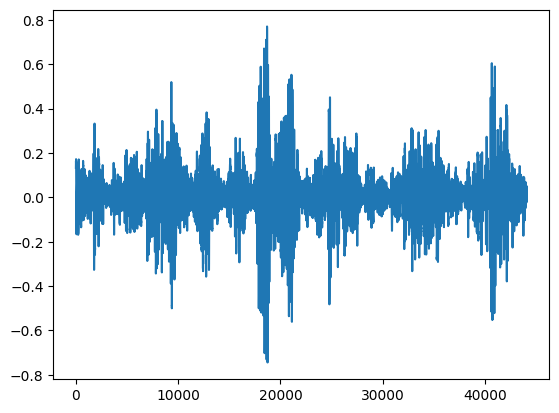

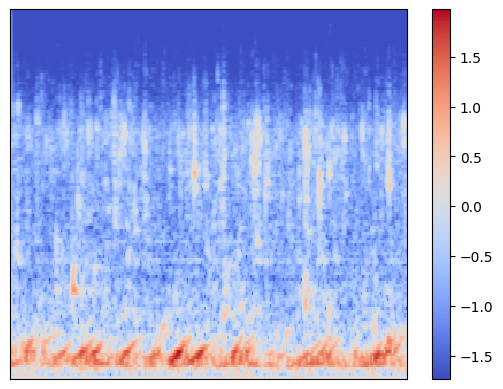

In [60]:
fs = 44100
# 次の行の　class3/  の後に存在するファイル名を入れること
X = wav_div_nparr('class3/11.wav') # ファイル名は存在するものを指定
melsp = calculate_melsp(X[0])
show_wave(X[0])
show_melsp(melsp, fs)

In [50]:
from keras.optimizers import Adam
from tensorflow.keras.layers import Input
from keras.models import Model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, GlobalAveragePooling2D,MaxPooling2D,Flatten
from keras.layers import BatchNormalization, Add

def cba(inputs, filters, kernel_size, strides):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

# define CNN
inputs = Input(shape=(x_train.shape[1:]))

x_1 = cba(inputs, filters=32, kernel_size=(1,8), strides=(1,2))
x_1 = cba(x_1, filters=32, kernel_size=(8,1), strides=(2,1))
x_1 = MaxPooling2D(pool_size = (2, 2))(x_1)
x_1 = cba(x_1, filters=64, kernel_size=(1,8), strides=(1,2))
x_1 = cba(x_1, filters=64, kernel_size=(8,1), strides=(2,1))

x_2 = cba(inputs, filters=32, kernel_size=(1,16), strides=(1,2))
x_2 = cba(x_2, filters=32, kernel_size=(16,1), strides=(2,1))
x_2 = MaxPooling2D(pool_size = (2, 2))(x_2)
x_2 = cba(x_2, filters=64, kernel_size=(1,16), strides=(1,2))
x_2 = cba(x_2, filters=64, kernel_size=(16,1), strides=(2,1))

x_3 = cba(inputs, filters=32, kernel_size=(1,32), strides=(1,2))
x_3 = cba(x_3, filters=32, kernel_size=(32,1), strides=(2,1))
x_3 = MaxPooling2D(pool_size = (2, 2))(x_3)
x_3 = cba(x_3, filters=64, kernel_size=(1,32), strides=(1,2))
x_3 = cba(x_3, filters=64, kernel_size=(32,1), strides=(2,1))

x = Add()([x_1, x_2, x_3])
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)
x = cba(x, filters=64, kernel_size=(1,8), strides=(1,2))
x = cba(x, filters=64, kernel_size=(8,1), strides=(2,1))
x = GlobalAveragePooling2D()(x)

x = Dense(64)(x)
x = Activation("relu")(x)
x = Dense(classes)(x)
x = Activation("softmax")(x)

model = Model(inputs, x)

# initiate Adam optimizer
opt = Adam(learning_rate=0.0001, decay=1e-6, amsgrad=True)

# Let's train the model using Adam with amsgrad
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

nepochs=100 で 100%予測可能<br>
nepochs=30  で

In [51]:
nepochs=100 # 原典は10
history=model.fit(x_train,y_train,epochs=nepochs,batch_size=30,validation_data=(x_test, y_test))

Epoch 1/100
12/12 [==============================] - 5s 210ms/step - loss: 1.8883 - accuracy: 0.1912 - val_loss: 1.9424 - val_accuracy: 0.1765
Epoch 2/100
12/12 [==============================] - 2s 173ms/step - loss: 1.5977 - accuracy: 0.3559 - val_loss: 1.9321 - val_accuracy: 0.2471
Epoch 3/100
12/12 [==============================] - 2s 173ms/step - loss: 1.4226 - accuracy: 0.4735 - val_loss: 1.9262 - val_accuracy: 0.2471
Epoch 4/100
12/12 [==============================] - 2s 174ms/step - loss: 1.2910 - accuracy: 0.5000 - val_loss: 1.9225 - val_accuracy: 0.1294
Epoch 5/100
12/12 [==============================] - 2s 182ms/step - loss: 1.1814 - accuracy: 0.5735 - val_loss: 1.9133 - val_accuracy: 0.1294
Epoch 6/100
12/12 [==============================] - 2s 181ms/step - loss: 1.0870 - accuracy: 0.6176 - val_loss: 1.9017 - val_accuracy: 0.2000
Epoch 7/100
12/12 [==============================] - 2s 179ms/step - loss: 1.0064 - accuracy: 0.6765 - val_loss: 1.8922 - val_accuracy: 0.2000

<function matplotlib.pyplot.show(close=None, block=None)>

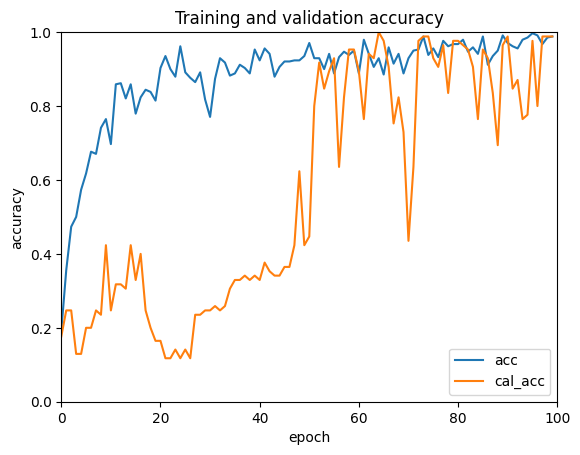

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim([0.0, nepochs])
plt.ylim([0.0, 1.0])
plt.legend(['acc','cal_acc'],loc='lower right')
plt.show

In [56]:
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
pred_train = model.predict(x_train)
print(confusion_matrix(np.argmax(y_train,axis=1),np.argmax(pred_train,axis=1)))
print(classification_report(np.argmax(y_train,axis=1),np.argmax(pred_train,axis=1)))

11/11 [==============================] - 2s 98ms/step
[[50  0  0  0  0  0  0]
 [ 0 51  0  0  0  0  0]
 [ 0  0 45  0  0  0  0]
 [ 0  0  0 49  0  0  0]
 [ 0  0  0  0 46  0  0]
 [ 0  0  0  0  0 44  0]
 [ 0  0  0  0  0  3 52]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        46
           5       0.94      1.00      0.97        44
           6       1.00      0.95      0.97        55

    accuracy                           0.99       340
   macro avg       0.99      0.99      0.99       340
weighted avg       0.99      0.99      0.99       340



In [58]:
pred_test = model.predict(x_test)
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(pred_test,axis=-1)))
print(classification_report(np.argmax(y_test,axis=1),np.argmax(pred_test,axis=-1)))

3/3 [==============================] - 1s 440ms/step
[[10  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0 14  1  0  0  0]
 [ 0  0  0 11  0  0  0]
 [ 0  0  0  0 14  0  0]
 [ 0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      0.93      0.97        15
           3       0.92      1.00      0.96        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        10

    accuracy                           0.99        85
   macro avg       0.99      0.99      0.99        85
weighted avg       0.99      0.99      0.99        85



In [59]:
model.save('modelA')

In [ ]:
# folderx/class0   class1 ... 　のホルダーにwaveファイルを入れて、
# folderax.zip の名前で圧縮したファイルをアップロードしておくこと
# !unzip folderx.zip

手動で sounddatax というフォルダーを作り、その下に class0 というホルダを作り、<br>
テストしたい音声ファイル(拡張子 wav）のファイルを格納する。<br>
その後、以下のセルを実行すると、音声ファイルの種類を予測した値が表示される。

In [ ]:
folder = 'folderx/'
files = glob.glob(folder+'class*/*.wav')
Xls = []
yls = []
for file in files:
    label = file[file.find('class'):file.find('.wav')].split('/')[0][5:] # classの後の数字をとってくる
    x = wav_div_nparr(file)
    for i in range(x.shape[0]):
        melsp = calculate_melsp(x[i])
        Xls.append(melsp)
        yls.append(label)
X = np.array(Xls)
X = X.reshape(X.shape[0],X.shape[1],X.shape[2],1)
Y = np.array(yls).astype(int)
print(X.shape,Y.shape)
x_test=X

(1348, 128, 345, 1) (1348,)


In [ ]:
pred_test = model.predict(x_test)
print(np.argmax(pred_test,axis=1))
# 評価した音の分類値が表示される
# 0:class0、1:class1、2:class2、...

43/43 [==============================] - 2s 40ms/step
[3 3 3 ... 1 1 1]


In [ ]:
# 作ったフォルダーを zip ファイルにまとめる
# !zip -r  これから作るzipファイル名 の後に zipファイルにしたいフォルダを指定する
!zip -r folderx_class4.zip folderx/class4

  adding: folderx/class4/ (stored 0%)
  adding: folderx/class4/50.wav (deflated 4%)
  adding: folderx/class4/13.wav (deflated 3%)
  adding: folderx/class4/37.wav (deflated 4%)
  adding: folderx/class4/40.wav (deflated 4%)
  adding: folderx/class4/16.wav (deflated 3%)
  adding: folderx/class4/32.wav (deflated 4%)
  adding: folderx/class4/20.wav (deflated 4%)
  adding: folderx/class4/47.wav (deflated 4%)
  adding: folderx/class4/45.wav (deflated 4%)
  adding: folderx/class4/44.wav (deflated 4%)
  adding: folderx/class4/35.wav (deflated 4%)
  adding: folderx/class4/29.wav (deflated 4%)
  adding: folderx/class4/6.wav (deflated 3%)
  adding: folderx/class4/9.wav (deflated 3%)
  adding: folderx/class4/36.wav (deflated 3%)
  adding: folderx/class4/30.wav (deflated 4%)
  adding: folderx/class4/33.wav (deflated 3%)
  adding: folderx/class4/62.wav (deflated 4%)
  adding: folderx/class4/54.wav (deflated 4%)
  adding: folderx/class4/52.wav (deflated 4%)
  adding: folderx/class4/49.wav (deflated 4%